In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


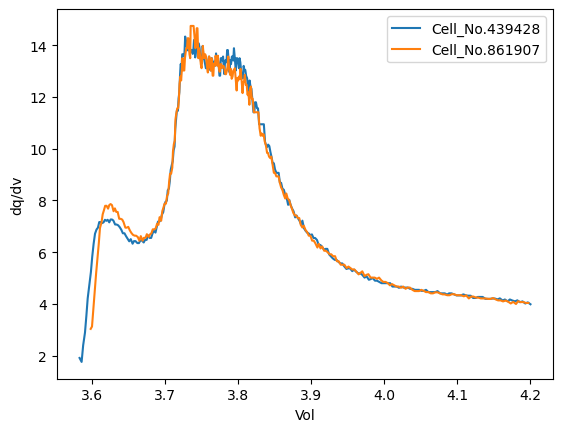

In [6]:
li=[439428,861907]
for i in li:

    df=pd.read_csv('2G09  {i}'.format(i=i)+'.csv')
    x=df[df['Step Type']=='CCCV_Chg']                                 #we take only charging data
    x['dq']=x['Capacity(Ah)']-x['Capacity(Ah)'].shift(1,fill_value=0) 
    x['dv']=x['Voltage(V)']-x['Voltage(V)'].shift(1,fill_value=0)
    x['dq/dv']=x['dq']/x['dv']                                        # calculated the dq/dv for charging data
    x = x.drop(x[np.isinf(x['dq/dv'])].index)     

    x1=x[x['Cycle Index']==200] 

    #we want to calaculate dq/dv till the 1st max value of vol. in every cycle.
    
    y=(x1['Step Time'][x1['Voltage(V)']==x1['Voltage(V)'].max()]).min() #we find the 'step time' for which our vol becomes max for the 1st time.
    x1=x1[x1['Step Time']<y]                                            # and take the dataset upto that particular step time.
    
    window_size=10                                                      # we took window size of 10 to calculate the moving average of dq/dv
    x1['dq/dvavg'] = x1['dq/dv'].rolling(window_size).mean()
    
    y3=x1['dq/dvavg']                                                   #put that average dq/dv in a column 
    
    x2=x1['Voltage(V)']
    plt.plot(x2,y3,label='Cell_ID.{i}'.format (i=i))
    plt.xlabel('Vol')
    plt.ylabel('dq/dv')
    plt.legend()
    